# Embed your interactive visualizations in Medium posts using datapane

In [9]:
import pandas as pd
import yfinance as yf
import warnings
import datapane as dp

import plotly.graph_objects as go
import matplotlib.pyplot as plt

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

[*********************100%***********************]  1 of 1 completed


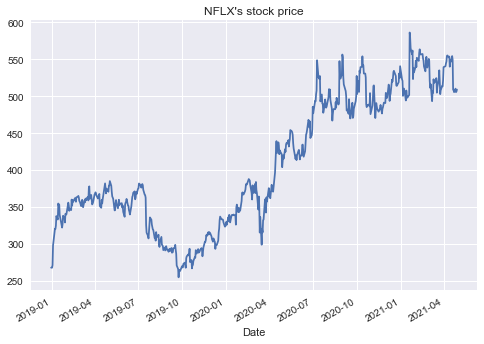

In [2]:
TICKER = "NFLX"

df = yf.download(TICKER, 
                 start="2019-01-01", 
                 end="2021-04-30", 
                 auto_adjust=True)

df["Close"].plot(title=f"{TICKER}'s stock price");

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,260.160004,270.100006,260.000000,267.660004,13508900
2019-01-02,259.279999,269.750000,256.579987,267.660004,11679500
2019-01-03,270.200012,275.790009,264.429993,271.200012,14969600
2019-01-04,281.880005,297.799988,278.540009,297.570007,19330100
2019-01-07,302.100006,316.799988,301.649994,315.339996,18620100


In [4]:
fig = go.Figure(data=
    [go.Candlestick(x=df.index,
                    open=df["Open"],
                    high=df["High"],
                    low=df["Low"],
                    close=df["Close"])]
)

fig.update_layout(
    title=f"{TICKER}'s adjusted stock price",
    yaxis_title="Price ($)"
)

fig.show()

## the `datapane` approach datapane

In [ ]:
dp.login("your_token")

### 1st report

In [6]:
report = dp.Report(
  dp.Text('# Netflix stock analysis'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("netflix_report_v1.html", open=True)
report.publish(name='netflix_report_v1', visibility=dp.Visibility.PUBLIC)

Thanks for using **Datapane**, to automate and securely share documents in your organization please see [Datapane Cloud](https://datapane.com/)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/erykml/reports/netflix-report-v1/ - you can edit and add additional text online

### 2nd report

In [7]:
report = dp.Report(
  dp.Text('# Netflix stock analysis'),
  dp.Text('Short analysis of the adjusted prices of Netflix'),
  dp.Table(df.head(), caption="First 5 observations"),
  dp.Table(df.tail(), caption="Last 5 observations"),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.publish(name='netflix_report_v2', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/erykml/reports/netflix-report-v2/ - you can edit and add additional text online

### 3rd report

In [8]:
report = dp.Report(
    dp.Page(
        title="Overview",
        blocks=[
            dp.Text('# Netflix stock analysis'),
            dp.Text('Short analysis of the adjusted prices of Netflix'),
            dp.Group(
                dp.Table(df.head(), caption="First 5 observations"),
                dp.Table(df.tail(), caption="Last 5 observations"),
                columns=2
            ),
            dp.Plot(fig, caption="Interactive plot generated with `plotly`")
            ]
    ),
    dp.Page(
        title="Dataset",
        blocks=["# Netflix stock history", dp.DataTable(df)]
    )
)

report.publish(name='netflix_report_v3', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/erykml/reports/netflix-report-v3/ - you can edit and add additional text online